In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
from tqdm import tqdm

from aind_behavior_gym.dynamic_foraging.task import (CoupledBlockTask)
from aind_dynamic_foraging_models import generative_model
from aind_dynamic_foraging_models.generative_model import ForagerCollection
from aind_behavior_gym.dynamic_foraging.agent.random_agent import RandomAgent, RandomAgentBiasedIgnore


from aind_dynamic_foraging_models.generative_model.params import ParamsSymbols
from aind_dynamic_foraging_models.generative_model.params.util import get_params_options

from aind_dynamic_foraging_models.logistic_regression import (
    fit_logistic_regression, MODEL_MAPPER,
    plot_logistic_regression, exp_func, COLOR_MAPPER
)

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='hdmf.utils')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
forager = ForagerCollection().get_preset_forager('Hattori2019', seed=42)
forager.set_params(
    softmax_inverse_temperature = 5,
    biasL = 0
)

# Set initial task environment for now
task = CoupledBlockTask(
    reward_baiting = True,
    num_trials = 1000,
    seed = 42
)

forager.params

ParamsModel(learn_rate_rew=0.5, learn_rate_unrew=0.1, forget_rate_unchosen=0.2, biasL=0.0, softmax_inverse_temperature=5.0)

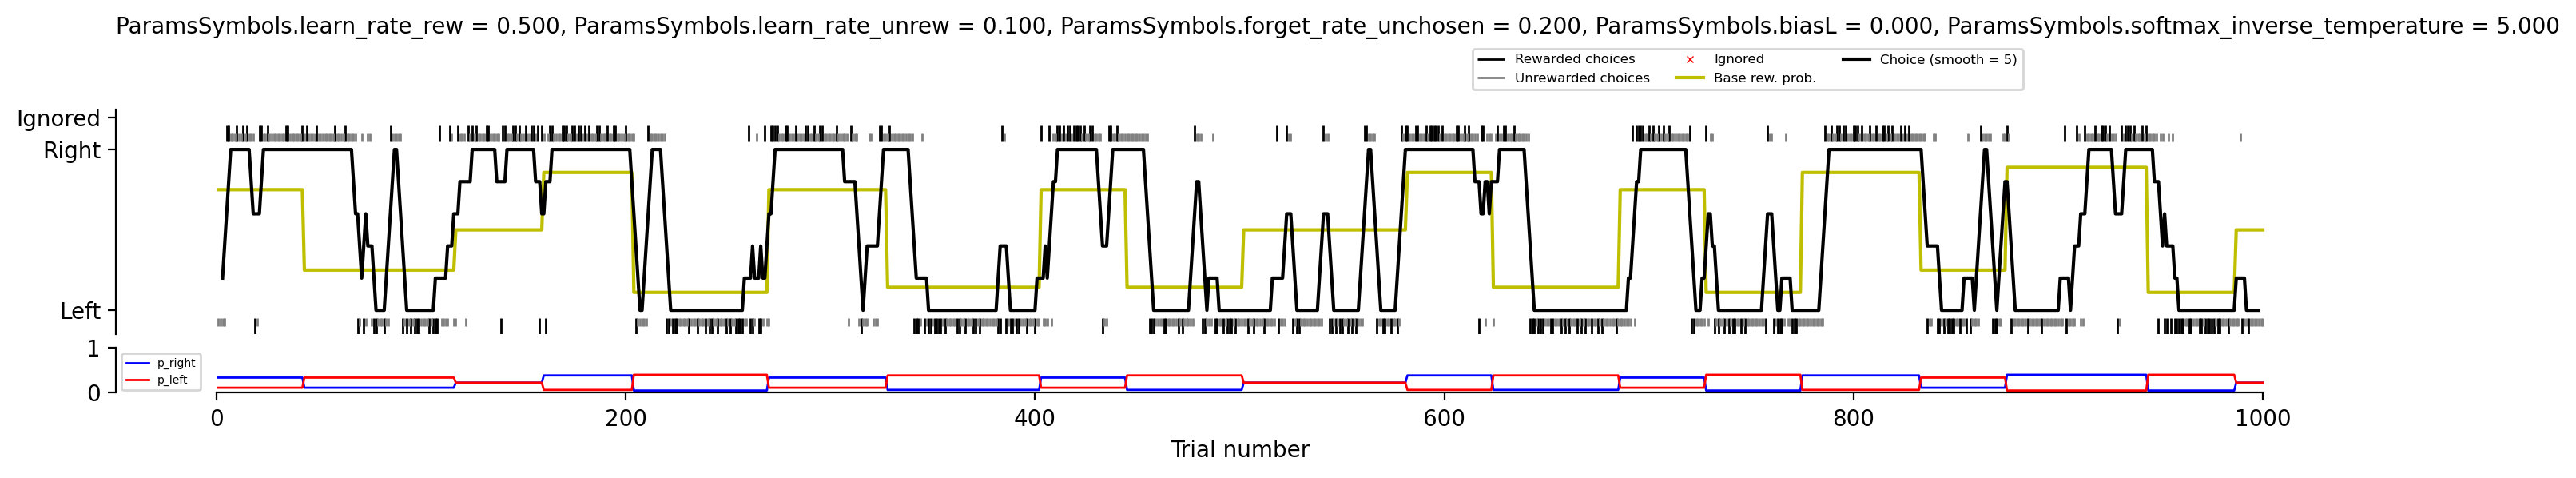

In [4]:
forager.perform(task)

choice_history = forager.get_choice_history()
reward_history = forager.get_reward_history()
p_reward = forager.get_p_reward()

fig, axes = forager.plot_session(if_plot_latent=False)

In [14]:
# Single fit trial

dict_logistic_result = fit_logistic_regression(choice_history, reward_history,
                                                   logistic_model = 'Su2022',
                                                   n_trial_back = 15, 
                                                   selected_trial_idx = None,
                                                   solver = 'liblinear',
                                                   penalty = 'l2',
                                                   Cs = 10,
                                                   cv = 10,
                                                   n_jobs_cross_validation = -1, 
                                                   n_bootstrap_iters = 1000,
                                                   n_bootstrap_samplesize = None)


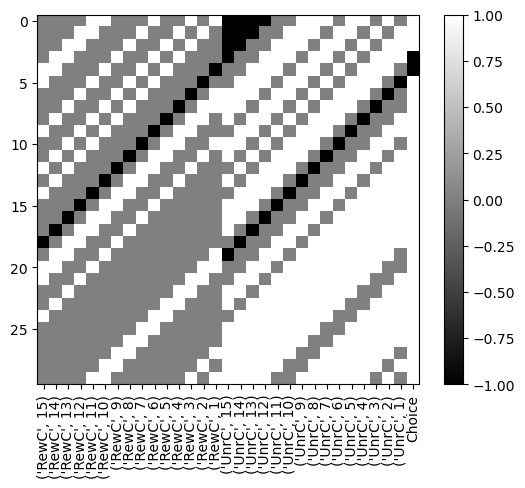

In [15]:
df_design = dict_logistic_result['df_design']

X = df_design.X.to_numpy()
Y = df_design.Y.to_numpy()
trials, var_names = df_design.index, df_design.X.columns

fig, ax = plt.subplots(1,1)
im = ax.imshow(np.concatenate([X[:30,:], Y[:30, :]], axis=1), cmap='gray')
ax.set_xticks(range(len(var_names) + 1))
ax.set_xticklabels(var_names.to_list() + ['Choice'], rotation=90)
fig.colorbar(im)
plt.show()

In [17]:
df_design

X                                               ...            \
var        RewC                                               ... UnrC        
trial_back   15   14   13   12   11   10    9    8    7    6  ...    9    8   
trial                                                         ...             
15         -0.0 -0.0 -0.0 -0.0  1.0  1.0  0.0  0.0  0.0  1.0  ...  1.0  1.0   
16         -0.0 -0.0 -0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0   
17         -0.0 -0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0   
18         -0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  1.0   
19          1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  1.0  1.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995        -0.0 -0.0 -1.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -1.0  ... -1.0 -1.0   
996        -0.0 -1.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -1.0 -0.0  ... -1.0  1.0   
997        -1.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -1.0 -0.0 -0.0  ...  1.0 -0.0   
998        -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -1.0 -0.0 -0.0 -1.0  ... -0.0 -1.0   
999        -0.0 -0.0 -0.0 -0.0  0.0 -1.0 -0.0 -0.0 -1.0 -0.0  ... -1.0 -1.0   

                                                   Y  
var                                           Choice  
trial_back    7    6    5    4    3    2    1      0  
trial                                                 
15          1.0  0.0  1.0  1.0  0.0  1.0  0.0    1.0  
16          0.0  1.0  1.0  0.0  1.0  0.0  1.0    1.0  
17          1.0  1.0  0.0  1.0  0.0  1.0  1.0    1.0  
18          1.0  0.0  1.0  0.0  1.0  1.0  1.0   -1.0  
19          0.0  1.0  0.0  1.0  1.0  1.0 -0.0   -1.0  
...         ...  ...  ...  ...  ...  ...  ...    ...  
995         1.0 -0.0 -1.0 -1.0 -0.0 -1.0 -1.0   -1.0  
996        -0.0 -1.0 -1.0 -0.0 -1.0 -1.0 -1.0   -1.0  
997        -1.0 -1.0 -0.0 -1.0 -1.0 -1.0 -1.0   -1.0  
998        -1.0 -0.0 -1.0 -1.0 -1.0 -1.0 -1.0   -1.0  
999        -0.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   -1.0  

[985 rows x 31 columns]

In [18]:
dict_logistic_result.keys()

dict_keys(['model', 'model_terms', 'n_trial_back', 'df_design', 'X', 'Y', 'df_beta', 'logistic_reg_cv', 'C', 'beta_bootstrap', 'df_beta_exp_fit'])

In [19]:
dict_logistic_result['df_beta']

cross_validation  bootstrap_mean  bootstrap_std  \
var  trial_back                                                    
RewC 15                 -0.012251       -0.011472       0.189891   
     14                  0.013903        0.005469       0.180944   
     13                  0.032260        0.030957       0.204444   
     12                  0.049834        0.047686       0.185581   
     11                  0.190841        0.186283       0.186016   
     10                  0.166232        0.182102       0.197950   
     9                   0.438568        0.456775       0.199607   
     8                   0.440431        0.459454       0.220201   
     7                   0.366012        0.360591       0.216757   
     6                   0.251022        0.282494       0.203509   
     5                   0.457007        0.470481       0.223465   
     4                   0.756182        0.779863       0.219539   
     3                   0.983888        0.990271       0.226335   
     2                   0.985825        1.020025       0.207201   
     1                   1.831036        1.885700       0.190024   
UnrC 15                 -0.154379       -0.161708       0.153473   
     14                  0.219298        0.224942       0.160142   
     13                 -0.139344       -0.143221       0.168536   
     12                 -0.066424       -0.072343       0.176624   
     11                  0.372323        0.385089       0.183696   
     10                 -0.112930       -0.102512       0.169854   
     9                   0.105795        0.095751       0.162542   
     8                  -0.086690       -0.087255       0.166564   
     7                   0.060714        0.059176       0.182616   
     6                   0.351776        0.374557       0.187830   
     5                  -0.162499       -0.182053       0.198867   
     4                   0.127327        0.129155       0.204626   
     3                   0.070835        0.072159       0.178254   
     2                  -0.096725       -0.081933       0.168144   
     1                   0.722111        0.760837       0.152927   
bias NaN                 0.097675        0.100236       0.101593   

                 bootstrap_CI_lower  bootstrap_CI_upper  
var  trial_back                                          
RewC 15                   -0.360414            0.375001  
     14                   -0.335754            0.361109  
     13                   -0.349783            0.436802  
     12                   -0.287724            0.411249  
     11                   -0.175622            0.573263  
     10                   -0.200677            0.570048  
     9                     0.086519            0.854889  
     8                     0.025405            0.897537  
     7                    -0.071557            0.770622  
     6                    -0.113689            0.661217  
     5                     0.052089            0.921849  
     4                     0.348962            1.209183  
     3                     0.532784            1.435775  
     2                     0.631220            1.417135  
     1                     1.520903            2.242661  
UnrC 15                   -0.456041            0.158373  
     14                   -0.090767            0.540439  
     13                   -0.473336            0.193014  
     12                   -0.413766            0.274473  
     11                    0.050657            0.751958  
     10                   -0.433984            0.217746  
     9                    -0.257761            0.410261  
     8                    -0.421327            0.222848  
     7                    -0.290797            0.409883  
     6                     0.011750            0.750239  
     5                    -0.556782            0.225782  
     4                    -0.277506            0.503418  
     3                    -0.301367            0.409395  
     2                    -0.419

In [21]:
dict_logistic_result['df_beta_exp_fit']

var        amp                      tau               
stat    fitted standard_error    fitted standard_error
RewC   2.15725       0.200128  3.687754       0.422013
UnrC  10.00000      38.177357  0.376597       0.537451

<Axes: title={'center': 'Su2022, L2 penalty, best C = 0.359 from 10-fold CV\nscore $\\pm$ std = 0.893 $\\pm$ 0.04; CI from 1000 bootstraps'}, xlabel='Past trials', ylabel='Logistic regression coeffs'>

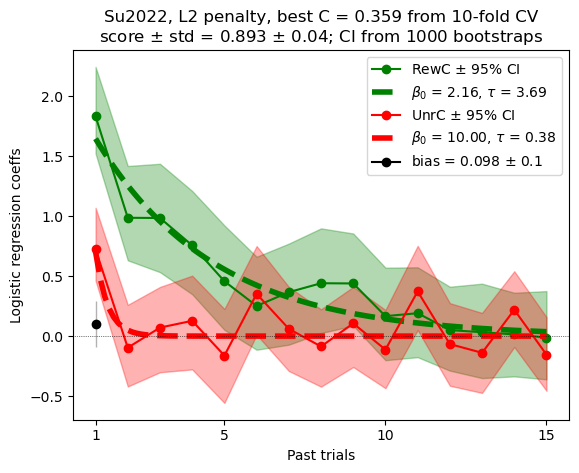

In [22]:
plot_logistic_regression(dict_logistic_result)